<a href="https://colab.research.google.com/github/raulbenitez/conceptosclaros_ML/blob/master/Exploraci%C3%B3n_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estructura de la sesión:
- Introducción
- Parte 1: Exploración de datos con pandas
- Parte 2: Representación gráfica de datos
- Parte 3: Agrupamiento de datos

# Introducción: Porqué Python? 
Python es un lenguaje de programación de alto nivel que permite resolver problemas de proòpsit general. Es especialmente útil en aplicaciones de tratamiento de datos, reconocimiento de patrones e inteligencia artificial.

El objetivo de esta primera parte del curso no es hacer un curso de programación en Python, sino más bien que lo esté utilizando como una herramienta que le será muy útil en diferentes situaciones relacionadas con el análisis explotaròria de datos. Piense en una especie de calculadora científica muy potente.

Python es un lenguaje organizado en diferentes librerías que resultan útiles en diferentes situaciones. Las más importantes en el ámbito del análisis de datos son las siguientes:

NumPy: Operaciones matemáticas básicas con vectores y matrices: https://numpy.org/

Scipy: Operaciones básicas de estadística: https://www.scipy.org/

Pandas: Permite manipular ficheros de datos en formato excel, csv, texto, etc. https://pandas.pydata.org/

Seaborn: Representación gráfica de datos en formato pandas: https://seaborn.pydata.org/

sckit-learn: Herramientas de reconocimiento de patrones e inteligencia artificial https://scikit-learn.org/stable/

sckit-image: Tratamiento de imágenes https://scikit-image.org/




## Jupyter notebooks y google colab

Hay una gran cantidad de entornos de programación que permiten desarrollar programas con Python.

Entre todas las opciones, nosotros utilizaremos una plataforma cloud de google llamada google colaboratory que ya tiene todas las librerías disponibles y permite trabajar sin la necesidad de instalar nada en nuestros ordenadores:

https://colab.research.google.com/


Lo único que nos pide para empezar a trabajar es una cuenta de google. Además, nos permite ejecutar los programas en los servidores de google, lo que puede ser muy útil cuando manipulamos grandes cantidades de datos.

La forma de programar en esta plataforma son los jupyter notebooks: Un notebook es un documento que combina texto y código Python. El texto se utiliza para explicar lo que hacemos en cada momento, y el código Python excuta diferentes segmentos de código que realizan diferentes funciones.


## Acceso a contenidos del google drive:

Podemos acceder a los archivos que tengamos almacenados en nuestro google drive. Para poder acceder hay que montar la unidad google drive en red. Nos pedirá que ponemos un código de verificación de los permisos de acceso.

In [116]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


La función os.walk explora de forma recursiva el árbol de directorios a partir de un directorio de origen. La función devuelve los directorios y ficheros que va encontrando en durante la exploración:

In [ ]:
import os

root_folder = '/content/gdrive/My Drive/data_course'

for root, dirs, files in os.walk(root_folder, topdown=False):
    for name in files:
        print(os.path.join(root, name))
    for name in dirs:
        print(os.path.join(root, name))

/content/gdrive/My Drive/data_course/titanic/gender_submission.csv
/content/gdrive/My Drive/data_course/titanic/test.csv
/content/gdrive/My Drive/data_course/titanic/train.csv
/content/gdrive/My Drive/data_course/mpg_cars/auto-mpg.csv
/content/gdrive/My Drive/data_course/boston_crime/prueba/crime1.csv
/content/gdrive/My Drive/data_course/boston_crime/prueba/prueba2
/content/gdrive/My Drive/data_course/boston_crime/crime.csv
/content/gdrive/My Drive/data_course/boston_crime/prueba
/content/gdrive/My Drive/data_course/test_dates.xlsx
/content/gdrive/My Drive/data_course/test.xlsx
/content/gdrive/My Drive/data_course/titanic
/content/gdrive/My Drive/data_course/mpg_cars
/content/gdrive/My Drive/data_course/boston_crime


# Parte 1: Exploración de datos con pandas:

## Carga de datos desde fichero excel

Primero cargamos el archivo en nuestro google drive:

In [117]:
from google.colab import files 
import io
uploaded = files.upload()

Saving test.xlsx to test (1).xlsx


In [118]:
import pandas as pd
df = pd.read_excel('test.xlsx', index_col=0,header=2)

Ahora consultamos el contenido del archivo mirando la cabecera:

In [120]:
df.head(3)

,Humans,Robots
Date,,
2019-03-10,10,3
2019-03-11,13,10
2019-03-12,16,17


También podriamos haberlo leído desde el google drive


In [ ]:
file_gd = '/content/gdrive/My Drive/data_course/test.xlsx'
dff = pd.read_excel(file_gd,index_col=0,header=2)
dff.head()

,Humans,Robots
Date,,
2019-03-10,10,3
2019-03-11,13,10
2019-03-12,16,17
2019-03-13,19,24
2019-03-14,22,31


O directamente desde github en este caso en formato csv:

In [ ]:
!wget -O test_git.csv 'https://raw.githubusercontent.com/raulbenitez/conceptosclaros_ML/master/test.csv'
dfff = pd.read_csv('/content/test_git.csv',index_col=0,header=2,sep=';')
dfff.head()


--2020-06-18 09:45:08--  https://raw.githubusercontent.com/raulbenitez/conceptosclaros_ML/master/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217 [text/plain]
Saving to: ‘test_git.csv’

test_git.csv        100%[===================>]     217  --.-KB/s    in 0s      

2020-06-18 09:45:08 (8.40 MB/s) - ‘test_git.csv’ saved [217/217]



,Humans,Robots
Date,,
18/06/2020,10,3
19/06/2020,13,10
20/06/2020,16,17
21/06/2020,19,24
22/06/2020,22,31


### Manipulación básica de datos en pandas:




Consultamos las dimensiones del archivo (filas, columnas):

In [121]:
df.shape

(9, 2)

Accedemos a una de las columnas:

In [122]:
df['Humans']

Date
2019-03-10    10
2019-03-11    13
2019-03-12    16
2019-03-13    19
2019-03-14    22
2019-03-15    25
2019-03-16    28
2019-03-17    31
2019-03-18    34
Name: Humans, dtype: int64

In [123]:
df['Humans'].values


array([10, 13, 16, 19, 22, 25, 28, 31, 34])

Buscamos los datos en un cierto intervalo de tiempo:

In [124]:
import datetime 
df.loc[datetime.date(year=2019,month=1,day=1):datetime.date(year=2019,month=3,day=11)]


,Humans,Robots
Date,,
2019-03-10,10,3
2019-03-11,13,10


Podemos buscar los datos que cumplen cierta condición:


In [125]:
df.loc[df['Humans']>6]

,Humans,Robots
Date,,
2019-03-10,10,3
2019-03-11,13,10
2019-03-12,16,17
2019-03-13,19,24
2019-03-14,22,31
2019-03-15,25,38
2019-03-16,28,45
2019-03-17,31,52
2019-03-18,34,59


Y hacer búsqueda combinada de diferentes restricciones:

In [126]:
df.loc[(df['Humans']>6) & (df['Robots']>20)]

,Humans,Robots
Date,,
2019-03-13,19,24
2019-03-14,22,31
2019-03-15,25,38
2019-03-16,28,45
2019-03-17,31,52
2019-03-18,34,59


## Bases de datos de Kaggle: El Titanic dataset:

Ahora miramos algún tipo de datos más interesantes:

https://www.kaggle.com/c/titanic


También se puede acceder a los datos en mi unidad de drive de google: https://drive.google.com/drive/folders/1PWe3IfY24py2lOBjsPgluDjTQnSGvXhN?usp=sharing


In [127]:
df1 = pd.read_csv('/content/gdrive/My Drive/data_course/titanic/train.csv')
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [128]:
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Lo primero que podemos hacer es consultar una tabla estadística descriptiva de los datos:

In [ ]:
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Cada fila corresponde a un pasajero, y las columnas son sus atributos (si sobrevivieron, en qué clase ivan, etc).



Podemos mirar qué fracción tenemos de supervivientes del total de pasajeros de la base de datos:

In [129]:
N = df1.shape[0]
Nvius = df1.loc[df1['Survived']==1].shape[0]
Nmorts = df1.loc[df1['Survived']==0].shape[0]
print('Hi ha un total de {} passatgers, dels quals {} van sobreviure i {} van morir'.format(N,Nvius,Nmorts))

Hi ha un total de 891 passatgers, dels quals 342 van sobreviure i 549 van morir


Podemos calcular los valores promedio de los atributos en función de si son o no supervivientes:

In [132]:
df1_agrupats = df1.groupby(by=['Survived'])
df1_agrupats.mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


Por ejemplo, vemos que los supervivientes son, en promedio, más jóvenes y además iban en camarotes de clase superior. De hecho la variable Fare (lo que pagaron por el pasaje) es claramente superior en los supervivientes.

Podemos responder a preguntas como: ¿cuál es el pasajero más joven y el más grande del conjunto de datos?

---



In [133]:
df1.sort_values(by=['Age'],ascending=False)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


### Gestión de datos incompletos

Vemos que desconocemos la edad de alguno de los pasajeros. En concreto, tenemos un total de 177 pasajeros de los que desconocemos su edad:


In [134]:
df1.loc[df1['Age'].isna()==True].shape[0]

177

Hay diferentes estrategias para tratar los datos desconocidos:

La primera sería eliminar los pasajeros de los que no tenemos su edad:

In [135]:
df1_ambedats = df1['Age'].dropna()
df1_ambedats.shape

(714,)

La segunda forma de proceder sería sustituir su edad por un valor constante, por ejemplo para la media de edades del resto de pasajeros:

In [136]:
df1_fillmean = df1.fillna(df1.mean())
df1_fillmean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


La tercera, y quizás la más inteligente, sería la de imputar una edad en función de la edad que tengan pasajeros con propiedades numéricas similares. Por eso tendremos que usar las librerías de inteligencia artificial sklearn:

https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html

Primero definimos un dataframe que sólo contenga los atributos numéricos:

In [137]:
df1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [138]:
df1_num = df1.select_dtypes(include='number')
df1_num.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [139]:
df1_num.loc[df1_num['Age'].isna()==True]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
5,6,0,3,NaN,0,0,8.4583
17,18,1,2,NaN,0,0,13.0000
19,20,1,3,NaN,0,0,7.2250
26,27,0,3,NaN,0,0,7.2250
28,29,1,3,NaN,0,0,7.8792
...,...,...,...,...,...,...,...
859,860,0,3,NaN,0,0,7.2292
863,864,0,3,NaN,8,2,69.5500
868,869,0,3,NaN,0,0,9.5000
878,879,0,3,NaN,0,0,7.8958


In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputed_data = imputer.fit_transform(df1_num)

df1_imputed = pd.DataFrame(imputed_data,columns=df1_num.columns)
df1_imputed.loc[df1_num['Age'].isna()==True]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
5,6.0,0.0,3.0,30.5,0.0,0.0,8.4583
17,18.0,1.0,2.0,44.5,0.0,0.0,13.0000
19,20.0,1.0,3.0,14.5,0.0,0.0,7.2250
26,27.0,0.0,3.0,24.5,0.0,0.0,7.2250
28,29.0,1.0,3.0,40.5,0.0,0.0,7.8792
...,...,...,...,...,...,...,...
859,860.0,0.0,3.0,19.5,0.0,0.0,7.2292
863,864.0,0.0,3.0,39.0,8.0,2.0,69.5500
868,869.0,0.0,3.0,15.0,0.0,0.0,9.5000
878,879.0,0.0,3.0,19.5,0.0,0.0,7.8958


Comentario: También podemos acceder al dataset titanic y a muchos otros de prueba mediante algunas de las librerías de Python para hacer tratamiento de datos. En este caso, por ejemplo, a partir de las librerías de representación gráfica Seaborn https://seaborn.pydata.org/

In [141]:
KNNImputer?

In [142]:
import seaborn as sns
dtitanic = sns.load_dataset('titanic')
dtitanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Ejercicio 1: Cargue los datos mpg cars de la web de Kaggle datasets:

https://www.kaggle.com/uciml/autompg-dataset

El conjunto de datos contiene 9 atributos de un total de 398 coches. Algunos atributos son numéricos, de otros son categóricos.

1. mpg: miles por gallon: continuous
2. cylinders: multi-Valued discrete
3. displacement: continuous
4. Horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. modelo year: multi-Valued discrete (1: USA, 2: Europe, 3: Japan)
8. origin: multi-Valued discrete
9. caro name: string (unique for each instance)


Responda a las siguientes cuestiones:

  a) ¿Cuál es el rango de años de los coches incluidos en los datos?

  b) ¿Cuántos coches hay que sean del año 74?

  c) ¿Cuál es el peso medio y el mpg promedio de los coches del año 70? Y los del año 80? Observa alguna tendencia en la evolución de estas dos magituds a medida que incrementa el año del modelo?

In [146]:
df2 = pd.read_csv('/content/gdrive/My Drive/data_course/mpg_cars/auto-mpg.csv')
df2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Lo primero que podemos hacer es sustituir los valores numéricos de la columna origin por las palabras que describen el origen del coche:


In [151]:
df2['origin'] = df2.origin.replace([1,2,3],['USA','Europe','Japan'])
df2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,USA,ford torino


In [ ]:
df2.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

Los modelos van del año 70 al año 82:

In [ ]:
df2.sort_values(by=['model year'])

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,USA,chevrolet chevelle malibu
28,9.0,8,304.0,193,4732,18.5,70,USA,hi 1200d
27,11.0,8,318.0,210,4382,13.5,70,USA,dodge d200
26,10.0,8,307.0,200,4376,15.0,70,USA,chevy c20
25,10.0,8,360.0,215,4615,14.0,70,USA,ford f250
...,...,...,...,...,...,...,...,...,...
368,27.0,4,112.0,88,2640,18.6,82,USA,chevrolet cavalier wagon
367,28.0,4,112.0,88,2605,19.6,82,USA,chevrolet cavalier
396,28.0,4,120.0,79,2625,18.6,82,USA,ford ranger
381,36.0,4,107.0,75,2205,14.5,82,Japan,honda accord


También lo podemos hacer con:

In [ ]:
df2.describe()

,mpg,cylinders,displacement,weight,acceleration,model year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000


df2.describe

In [ ]:
N70 = df2.loc[df2['model year']==70].shape[0]

print('Hay un total de {} coches del 70'.format(N70))

Hay un total de 29 coches del 70


A continuación podemos mirar la evolución de las diferentes características en función del año del modelo:

In [ ]:
df2.groupby(by=['model year']).mean()


,mpg,cylinders,displacement,weight,acceleration
model year,,,,,
70,17.689655,6.758621,281.413793,3372.793103,12.948276
71,21.250000,5.571429,209.750000,2995.428571,15.142857
72,18.714286,5.821429,218.375000,3237.714286,15.125000
73,17.100000,6.375000,256.875000,3419.025000,14.312500
74,22.703704,5.259259,171.740741,2877.925926,16.203704
75,20.266667,5.600000,205.533333,3176.800000,16.050000
76,21.573529,5.647059,197.794118,3078.735294,15.941176
77,23.375000,5.464286,191.392857,2997.357143,15.435714
78,24.061111,5.361111,177.805556,2861.805556,15.805556


El peso y mpg promedio de los coches del año 70 es de (3372,17.68) y el de los del año 80 de (2.436,33) respectivamente. Resulta evidente que con los tiempos los coches son más eficientes (mayor mpg) y más ligeros (menos peso). Esto se puede ver con la evolución de estas dos variables a lo largo de los años.

# Parte 2: Representación gráfica de datos:

Llegado este punto, necesitamos empezar a hacer gráficos para representar diferentes aspectos de lo que vemos en los datos. Para hacer gráficos de datos en formato dataframe de pandas, la mejor opción es utilizar las librerías Seaborn:

https://seaborn.pydata.org/

En el ejercicio anterior, queríamos representar la evolución de las variables mpg y peso en función del año del modelo.


In [147]:
import seaborn as sns
df22 = sns.load_dataset('mpg')
df22.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Gráficos sencillos

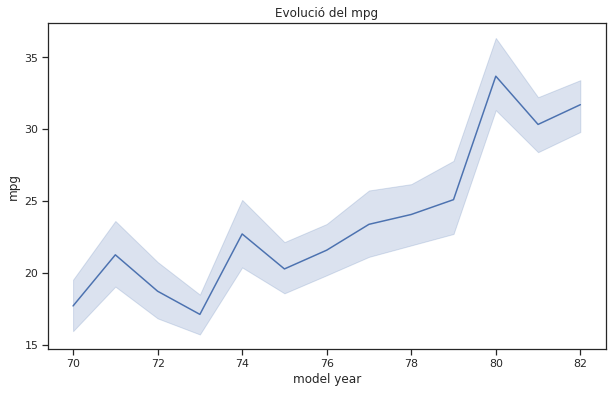

<Figure size 432x288 with 0 Axes>

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
ax = sns.lineplot(x="model year", y="mpg", data=df2)
ax.set_title('Evolució del mpg')
plt.show()
plt.savefig('evolucion.png')

Podemos hacer una figura con dos paneles, el superior que representa el mpg y el inferior representante la evolución del peso:

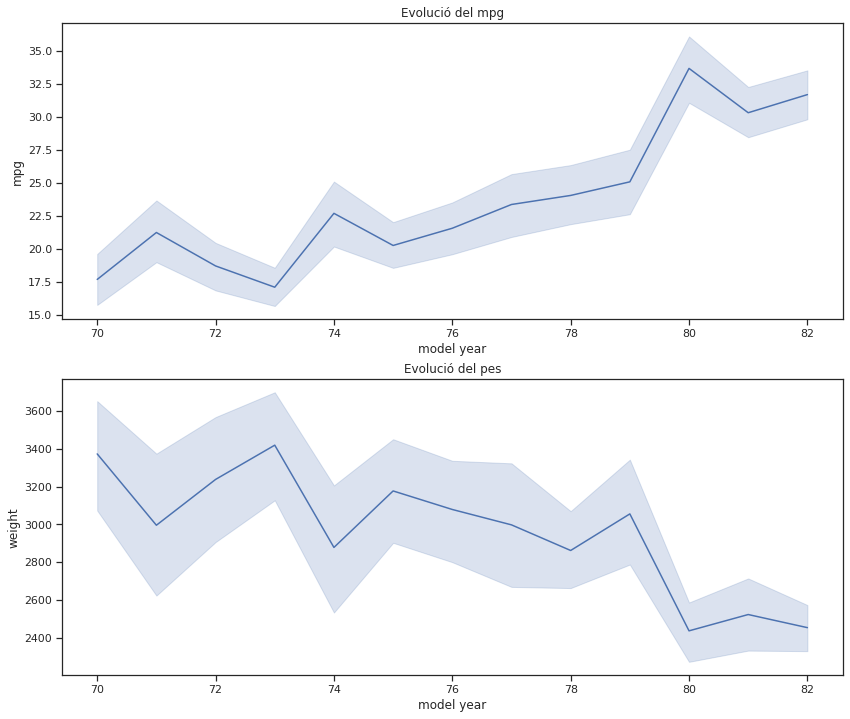

In [149]:

fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(211)
ax = sns.lineplot(x="model year", y="mpg", data=df2)
ax.set_title('Evolució del mpg')
ax1 = fig.add_subplot(212)
ax1 = sns.lineplot(x="model year", y="weight", data=df2)
ax1.set_title('Evolució del pes')
plt.show()

Multiples paneles en una figura:

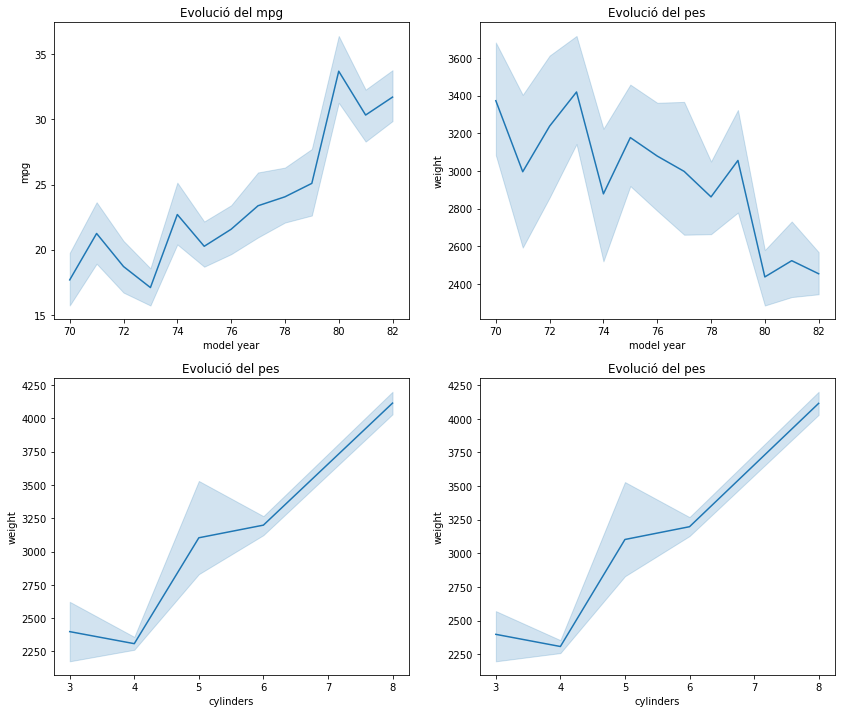

In [ ]:
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(221)
ax = sns.lineplot(x="model year", y="mpg", data=df2)
ax.set_title('Evolució del mpg')
ax1 = fig.add_subplot(222)
ax1 = sns.lineplot(x="model year", y="weight", data=df2)
ax1.set_title('Evolució del pes')
ax2 = fig.add_subplot(223)
ax2 = sns.lineplot(x="cylinders", y="weight", data=df2)
ax2.set_title('Evolució del pes')
ax3 = fig.add_subplot(224)
ax3 = sns.lineplot(x="cylinders", y="weight", data=df2)
ax3.set_title('Evolució del pes')
plt.show()

También podemos mirar cómo evoluciona el mpg en función de su origen:


In [152]:
df2['origin'].unique()

array(['USA', 'Japan', 'Europe'], dtype=object)

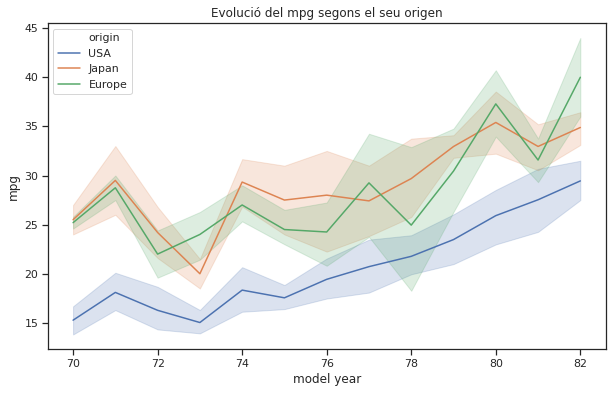

In [153]:
fig = plt.figure(figsize=(10,6))
ax = sns.lineplot(x="model year", y="mpg",hue='origin',data=df2)
ax.set_title('Evolució del mpg segons el seu origen')
plt.show()

Existe mucha correlación entre peso y eficiencia? Mirémoslo:



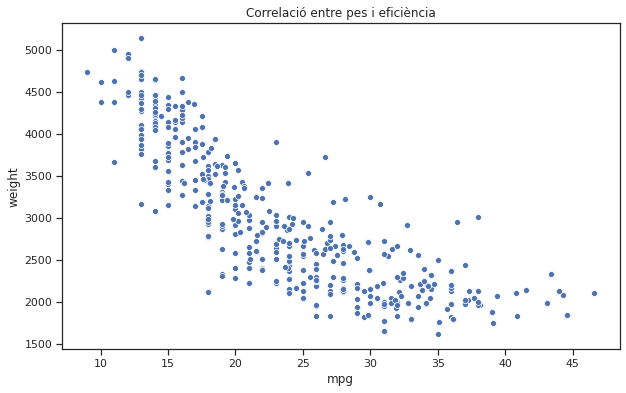

In [154]:
fig = plt.figure(figsize=(10,6))
ax = sns.scatterplot(x="mpg", y="weight", data=df2)
ax.set_title('Correlació entre pes i eficiència')
plt.show()

Podemos hacer un modelo lineal del comportamiento

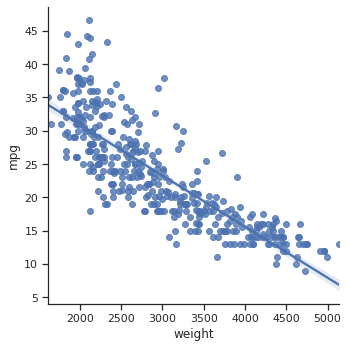

In [155]:
ax = sns.lmplot(x="weight", y="mpg", data=df2)


Teniendo en cuenta el origen, la relación entre peso y mpg puede ser diferente:

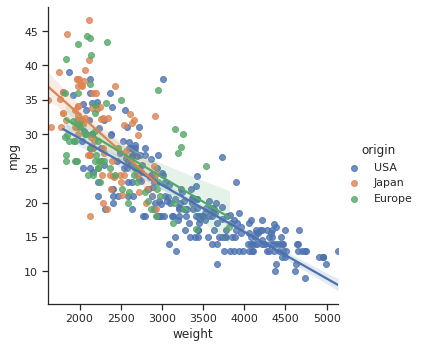

In [156]:
ax = sns.lmplot(x="weight", y="mpg", hue='origin',data=df2)


De hecho observamos que los coches de origen europeo y japonés suelen tener menor peso y una mayor eficiencia.

Y si queremos representar la aceleración en función del número de cilindros? Hay muchas opciones:

Un Scatterplot no parece la mejor de las opciones, porque la variable cylinders toma valores discretos:

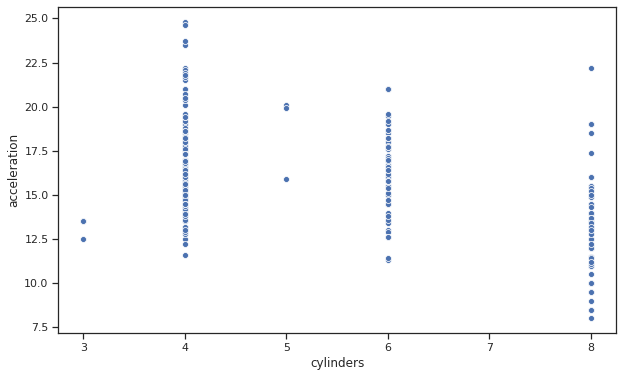

In [157]:
fig = plt.figure(figsize=(10,6))
ax = sns.scatterplot(x="cylinders", y="acceleration", data=df2)
plt.show()

Quizás mejor un gráfico de barras:

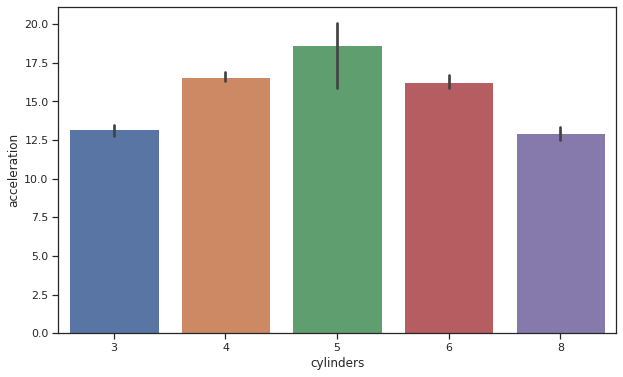

In [158]:
fig = plt.figure(figsize=(10,6))
ax = sns.barplot(x="cylinders", y="acceleration", data=df2)
plt.show()

Y en función de su origen vemos que los coches con sólo 3 cilindros son Japoneses y los de 8 son todos los USA.

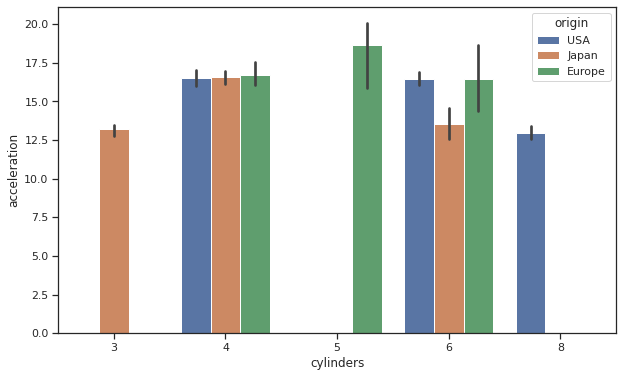

In [159]:
fig = plt.figure(figsize=(10,6))
ax = sns.barplot(x="cylinders", y="acceleration", hue='origin',data=df2)
plt.show()

Aceleracion vs peso en función de los cilindros


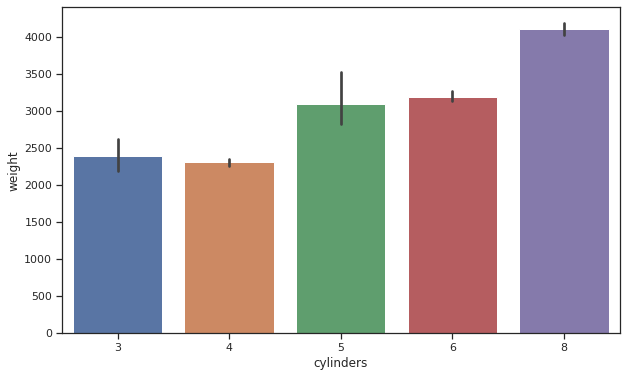

In [160]:
fig = plt.figure(figsize=(10,6))
ax = sns.barplot(x="cylinders", y="weight", data=df2)
plt.show()

## Histogramas

Probabilidad de observar un determinado rango de valores en la distribución de una variable:

¿Cuál es la distribución de la variable weight?

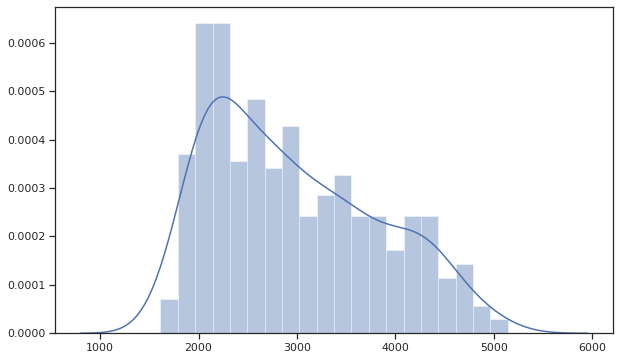

In [161]:
fig = plt.figure(figsize=(10,6))
ax=sns.distplot(df2["weight"].values,bins=20)

Si queremos marcar la posición del valor medio y de la mediana de la distribución


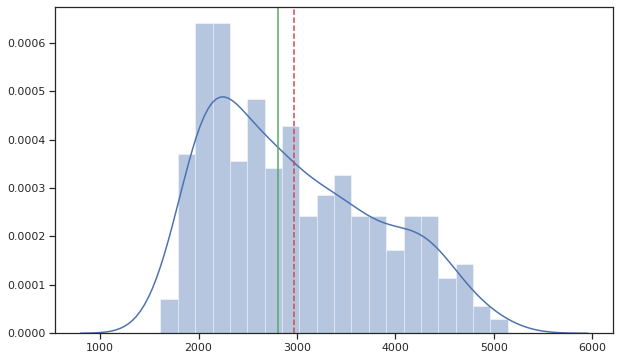

In [162]:
media_weight = df2['weight'].mean()
mediana_weight = df2['weight'].median()

fig = plt.figure(figsize=(10,6))
ax=sns.distplot(df2["weight"].values,bins=20)
plt.axvline(media_weight, color="r", linestyle="--");
plt.axvline(mediana_weight, color="g", linestyle="-");

Indicar donde esta la media y las desviaciones tipicas a la izquierda y derecha de la media:

In [163]:
std_weight = df2['weight'].std()


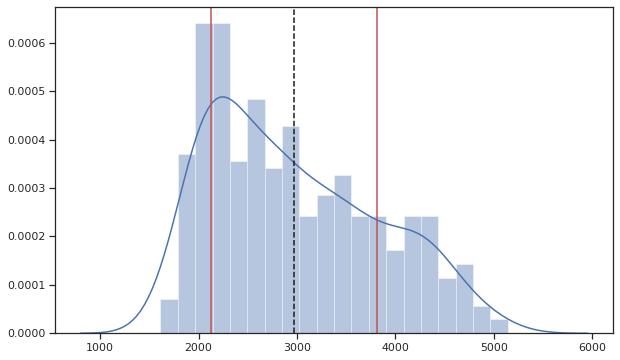

In [164]:

fig = plt.figure(figsize=(10,6))
ax=sns.distplot(df2["weight"].values,bins=20)
plt.axvline(media_weight, color="k", linestyle="--");
plt.axvline(media_weight-std_weight, color="r", linestyle="-");
plt.axvline(media_weight+std_weight, color="r", linestyle="-");


Como sería la distribución conjunta de las variables weight y acceleration?

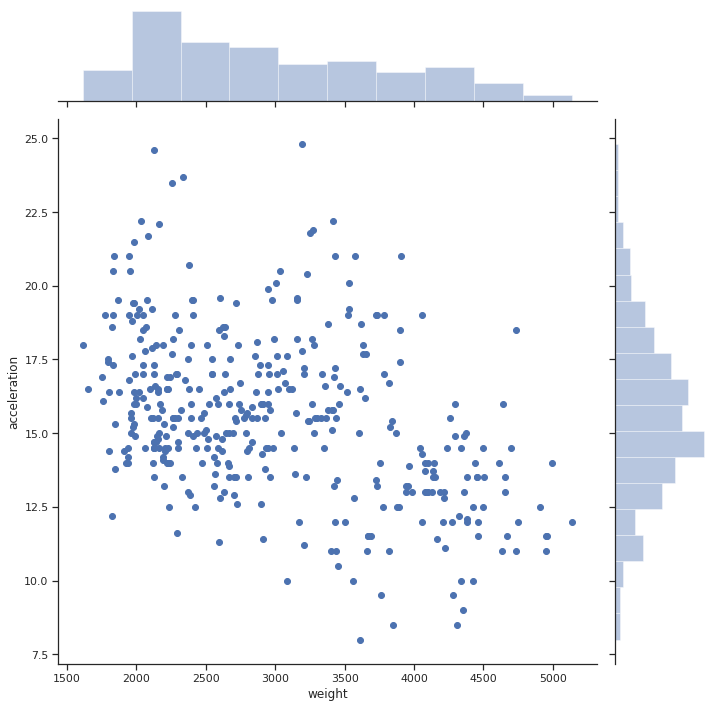

In [165]:
ax = sns.jointplot(x='weight',y='acceleration',data=df2,height=10)

## Representación de datos multivariados:

Por último, podemos hacer una representación de todas las variables de forma simultánea

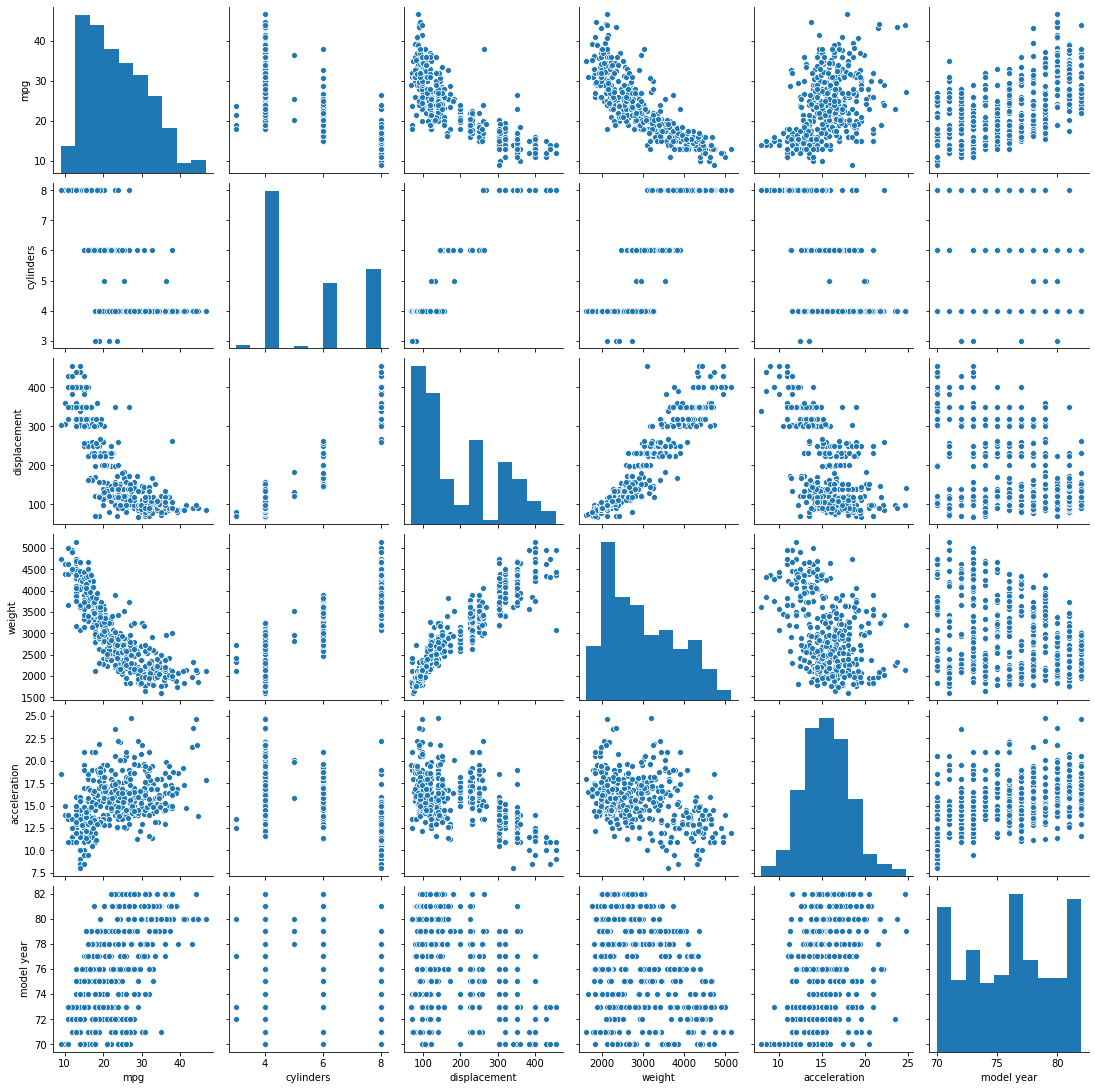

In [ ]:
sns.pairplot(df2)
plt.show()

Y la misma representación pero indicando con colores diferentes los coches según su origen

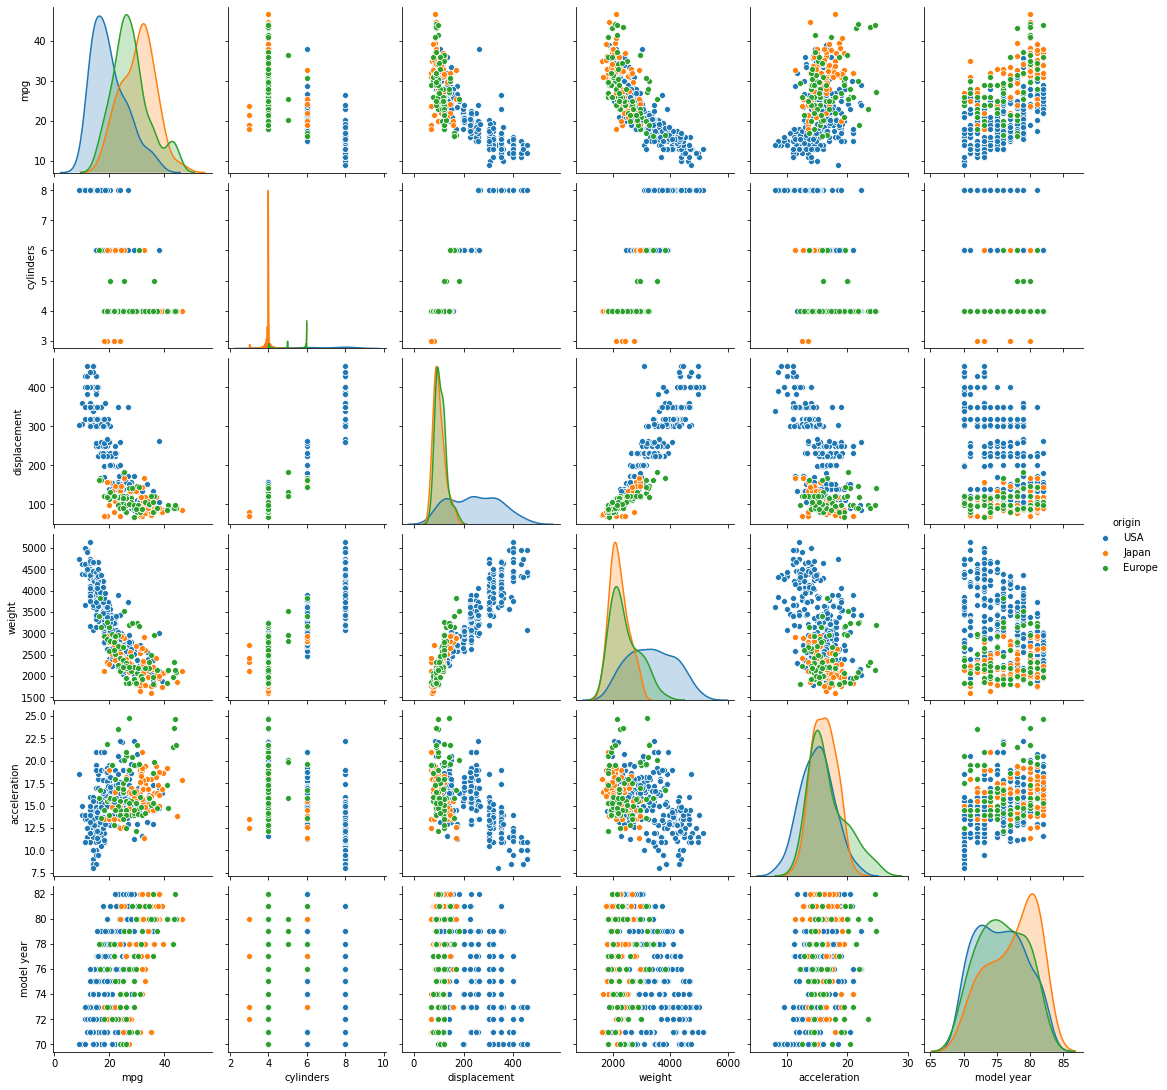

In [ ]:
sns.pairplot(df2,hue="origin")


Representar unicamente variables numéricas

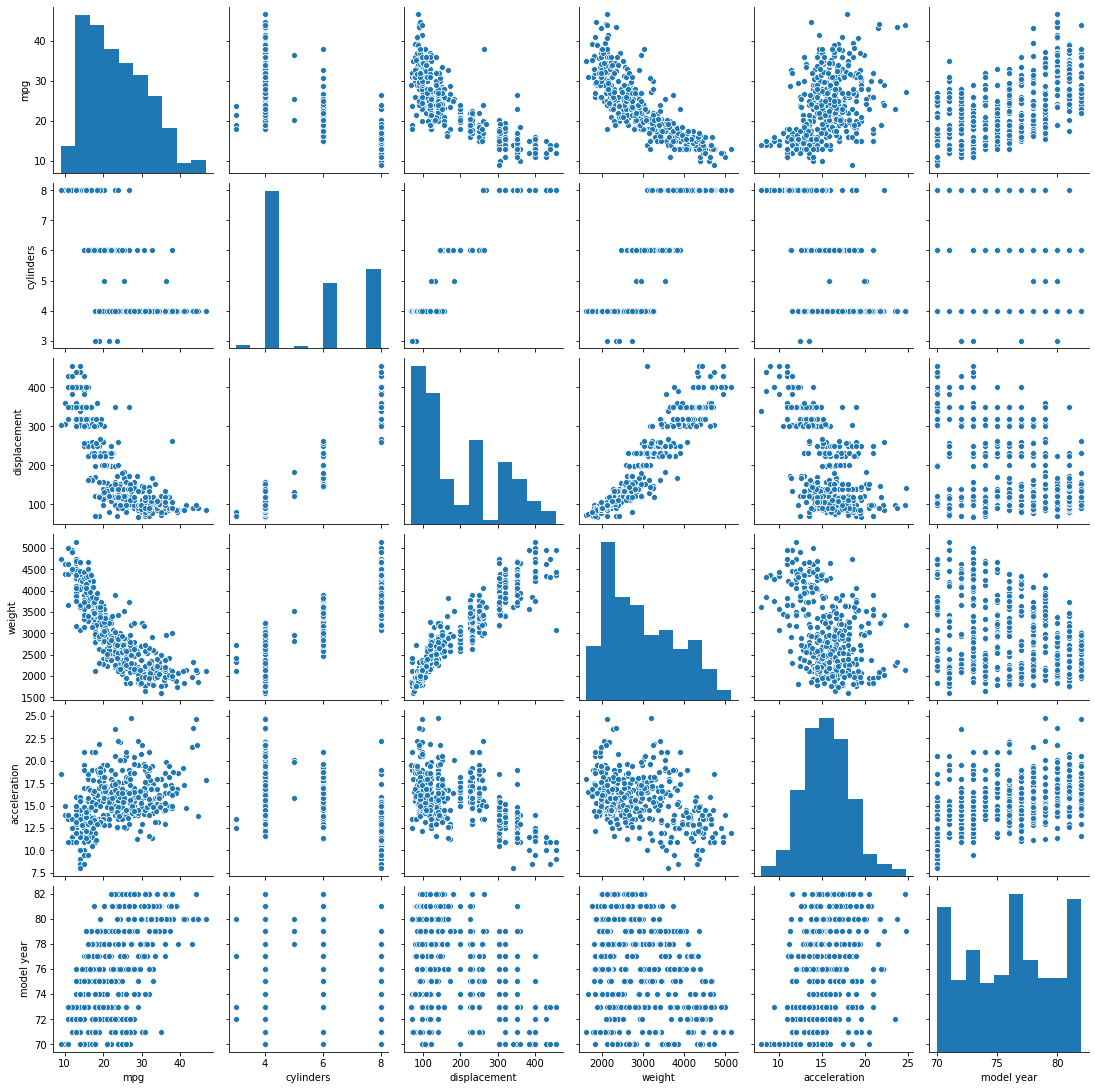

In [ ]:
df2_num = df2.select_dtypes(include='number')
sns.pairplot(df2_num)

### Ejercicio 2: Cargad el Boston Crime dataset

Y generad un informe en forma de jupyter notebook con las características más relevantes

In [ ]:
df3 = pd.read_csv('/content/gdrive/My Drive/data_course/boston_crime/crime.csv', engine='python')
df3.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"


In [ ]:
df3.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,327820.000000,327820.000000,327820.000000,327820.000000,307188.000000,307188.000000
mean,2317.961171,2016.598676,6.672213,13.114840,42.212995,-70.906030
std,1184.990073,1.009775,3.253984,6.292714,2.173496,3.515832
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297466,-71.097081
50%,2907.000000,2017.000000,7.000000,14.000000,42.325552,-71.077493
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062482
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


# Parte 3. Agrupamiento de datos (clustering):

Algoritmos no-supervisados que permiten agrupar datos multidimensionales en clusters:

## El algoritmo K-means:


[1] Specify the number of clusters $k$ to be found in data.

[2] Set initial values for the cluster centroids $\mu^0_1,\dots,\mu^0_k$ (at random or prior knowledge). 

[3] Assign each observation to the nearest cluster (euclidean distance).

[4] Recompute the centroid of each cluster from the assigned observations $\mu^1_1,\dots,\mu^1_k$.

[5] Repeat steps 3-4 until no change in the centroids. Provide final clustering $\mu^n_1,\dots,\mu^n_k$, where $n$ is the number of iterations. 


### Ejemplo introductorio

K-means con unas pocas observaciones


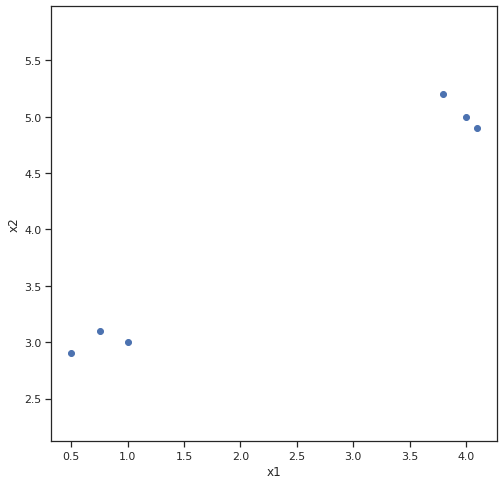

In [166]:
import numpy as np
import matplotlib.pylab as plt
D = np.array([[1,3],[3.8,5.2],[0.5,2.9],[0.75,3.1],[4,5],[4.1,4.9]])

fig = plt.figure(figsize=(8,8))
plt.scatter(D[:,0],D[:,1])
plt.axis('equal')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
plt.show()

In [167]:
D

array([[1.  , 3.  ],
       [3.8 , 5.2 ],
       [0.5 , 2.9 ],
       [0.75, 3.1 ],
       [4.  , 5.  ],
       [4.1 , 4.9 ]])

In [168]:
from sklearn.cluster import KMeans
group = KMeans(n_clusters=2).fit_predict(D)
print(group)

[1 0 1 1 0 0]


In [169]:
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns

df = pd.DataFrame(D,columns=['x','y'])
df['kmeans']=group
df.head()

,x,y,kmeans
0,1.00,3.0,1
1,3.80,5.2,0
2,0.50,2.9,1
3,0.75,3.1,1
4,4.00,5.0,0


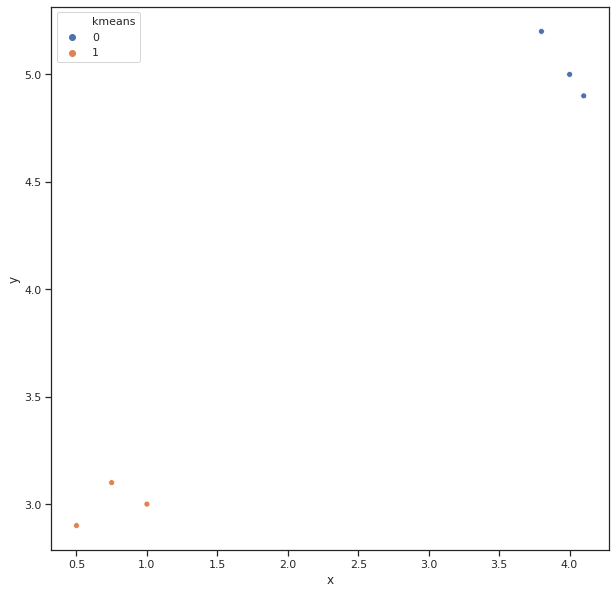

In [170]:
fig = plt.figure(figsize=(10,10)) 
sns.scatterplot(x='x',y='y',hue='kmeans',data=df)
plt.show()

NOTA: Si queremos conocer más detalles sobre los clústeres encontrados, utilizad la función fit y no fit_predict (ésta última devuelve sólo las etiquetas de asignación de las observaciones a clústeres, es decir la predicción del algoritmo k-means). El detalle de variables se puede consultar en https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [171]:
kmeans_result = KMeans(n_clusters=2).fit(D)
print('Etiquetas de asignacion a clusters {}'.format(kmeans_result.labels_))
print('Posición de los centroides de los clusters {}'.format(kmeans_result.cluster_centers_))
print('Número de iteraciones necesarias {}'.format(kmeans_result.n_iter_))

Etiquetas de asignacion a clusters [0 1 0 0 1 1]
Posición de los centroides de los clusters [[0.75       3.        ]
 [3.96666667 5.03333333]]
Número de iteraciones necesarias 2


### Agrupamiento del iris dataset:

In [172]:
import seaborn as sns; 

sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")

X = iris[['sepal_length','sepal_width','petal_length','petal_width']] # features
y = iris['species'] # class labels

K-means de los datos iris en 2 dimensiones:

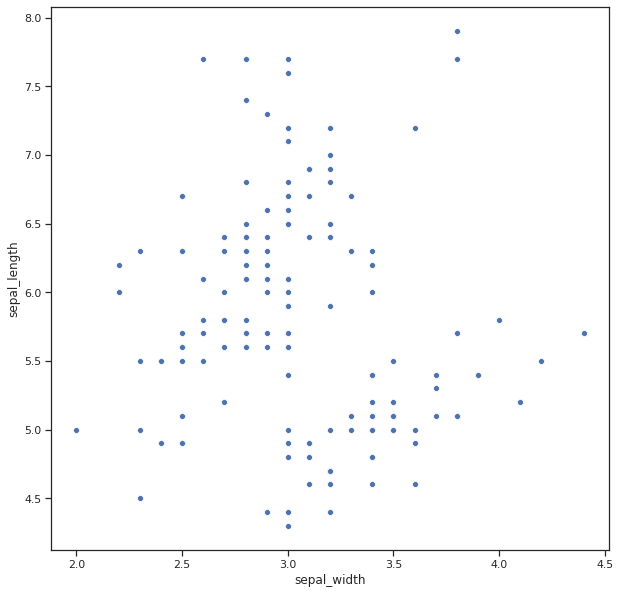

In [173]:
import matplotlib.pylab as plt
fig = plt.figure(figsize=(10,10)) 
sns.scatterplot(x='sepal_width',y='sepal_length',data=X)
plt.show()

In [174]:
import numpy as np
D = np.array(X)
D.shape

(150, 4)

Aplicamos k-means

In [175]:
group = KMeans(n_clusters=3).fit_predict(D[:,0:2])
print(group)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2
 0 0 0 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [180]:
group = KMeans(n_clusters=3).fit_predict(D)
print(group)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


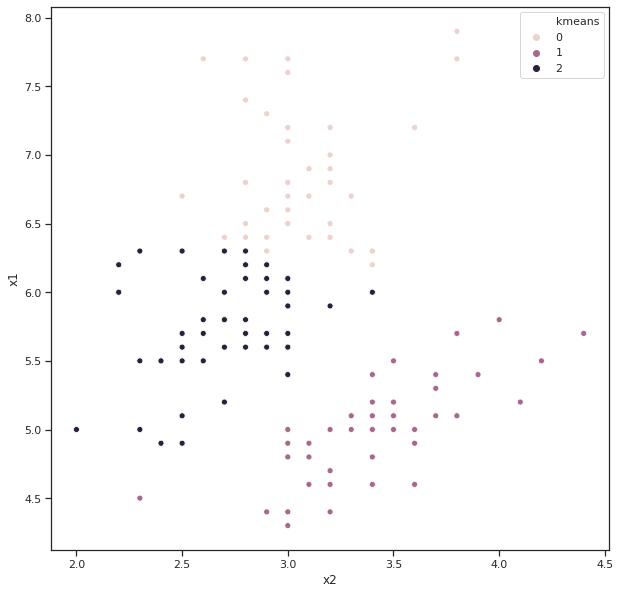

In [176]:
df = pd.DataFrame(D[:,0:2],columns=['x1','x2'])
df['kmeans'] = group 
fig = plt.figure(figsize=(10,10)) 
sns.scatterplot(x='x2',y='x1',hue='kmeans',data=df)
plt.show()

Aplicación a iris en 4D:

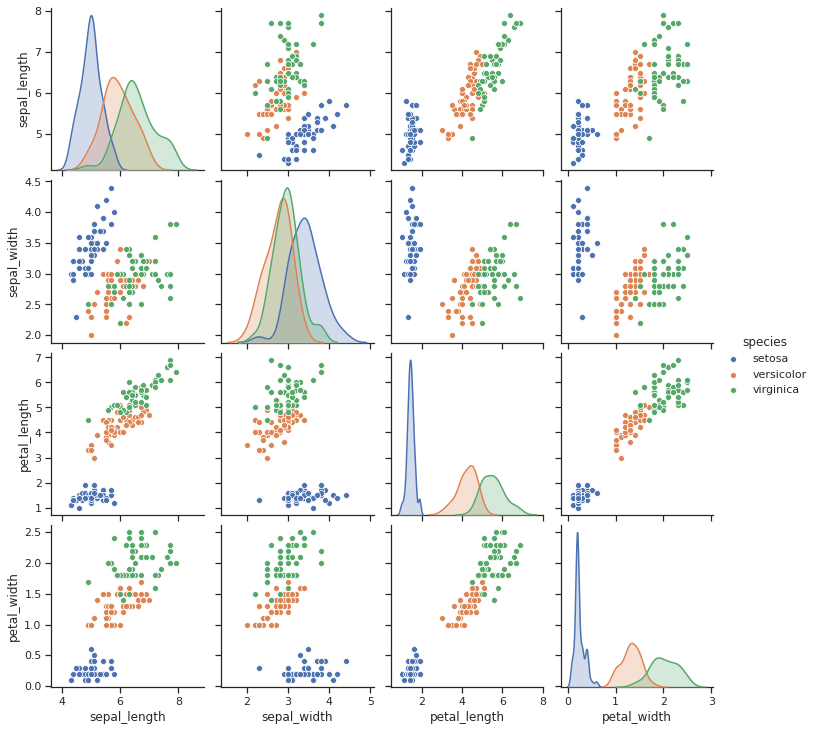

In [177]:
g = sns.pairplot(iris, hue="species")


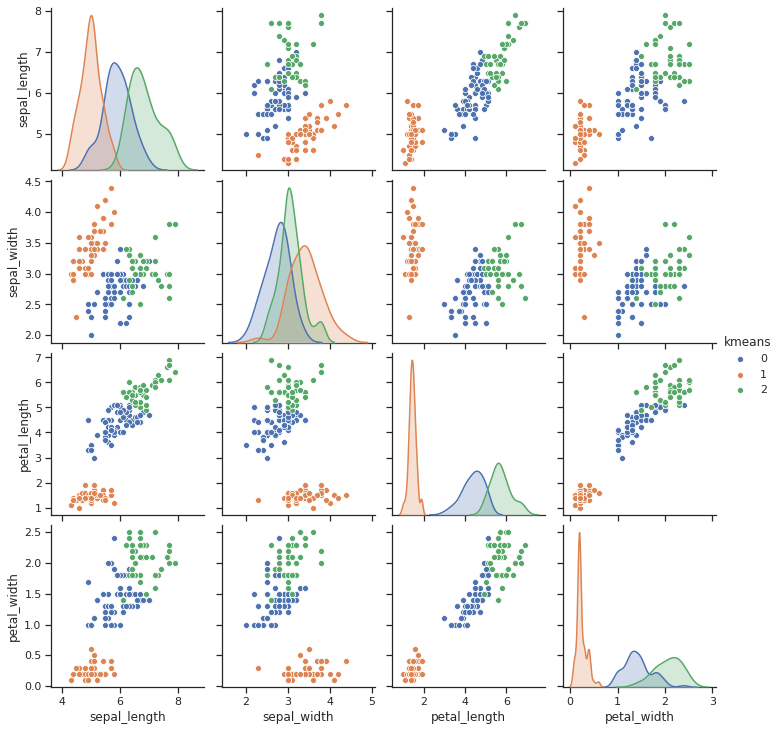

In [178]:
from sklearn.cluster import KMeans
group = KMeans(n_clusters=3).fit_predict(X)

iris_grouped = iris
iris_grouped['kmeans'] = group
g = sns.pairplot(iris_grouped, hue="kmeans")

In [179]:
iris_grouped.head(150)

,sepal_length,sepal_width,petal_length,petal_width,species,kmeans
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,0
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


### Ejercicio 3: Aplicar k-means a los datos mpg (cars, variables numéricas):
- Cargar datos
- Eliminar variables no-numéricas
- Representar pairplot y decidir cuángos clústers vamos a buscar
- Aplicar k-means
- Representar el resultado como un pairplot con grupos (clústeres)


### Datos artificiales (Blobs):

Simulamos una distribución de observaciones distribuidas en varios clústeres. Cada clúster tiene su localización (centroide) y su forma (dispersión en los ejes). 

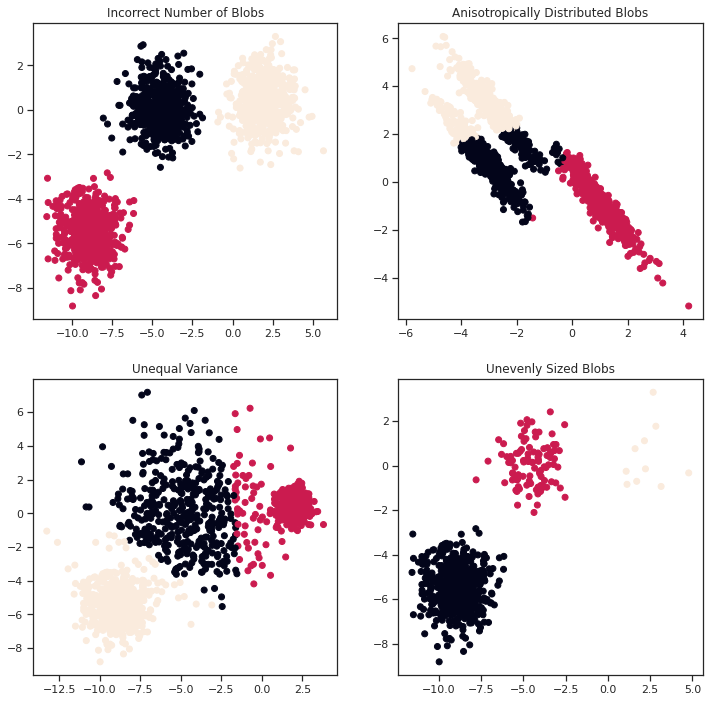

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X)

plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropically Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()